In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import random

In [7]:
#Loading dataset
df = pd.read_excel('OnlineRetail (1).xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
#Exploring Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
#Data Cleaning
df.shape
df.info()
df.isnull().sum()
ds=df.dropna()
ds.info()
ds.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   CustomeID    541909 non-null  object        
 9   Amount       541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 41.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 

(406829, 10)

# RFM

# R(Recency): Number of days since last purchase

# F(Frequency): Number of Transactions

# M(Monetary): Total Amount of transactions
(revenue contributed)

In [12]:
#Data Preprocessing
df['CustomeID'] = df['CustomerID'].astype(str)
df['Amount'] = df['Quantity']*df['UnitPrice']
rfm_ds_m = ds.groupby('CustomerID')['Amount'].sum()
rfm_ds_m.reset_index()
rfm_ds_m.column = ['CustomerID','Amount']
print(rfm_ds_m)

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64


In [13]:
rfm_ds_f = ds.groupby('CustomerID')['InvoiceNo'].count()
rfm_ds_f = rfm_ds_f.reset_index()
rfm_ds_f.columns = ['CustomerID','Frequency']
print(rfm_ds_f)

      CustomerID  Frequency
0        12346.0          2
1        12347.0        182
2        12348.0         31
3        12349.0         73
4        12350.0         17
...          ...        ...
4367     18280.0         10
4368     18281.0          7
4369     18282.0         13
4370     18283.0        756
4371     18287.0         70

[4372 rows x 2 columns]


In [15]:
ds['InvoiceDate'] = pd.to_datetime(ds['InvoiceDate'],format='%d-%m-%Y%H: %M')
max_date = max(ds['InvoiceDate'])
ds['Diff'] = max_date - ds['InvoiceDate']
rfm_ds_p = ds.groupby('CustomerID')['Diff'].min()
rfm_ds_p = rfm_ds_p.reset_index()
rfm_ds_p.columns = ['CustomerID','Diff']
rfm_ds_p['Diff'] = rfm_ds_p['Diff'].dt.days
print(rfm_ds_p)

C:\Users\AayushmaanS\AppData\Local\Temp\ipykernel_18564\2164023740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['InvoiceDate'] = pd.to_datetime(ds['InvoiceDate'],format='%d-%m-%Y%H: %M')


      CustomerID  Diff
0        12346.0   325
1        12347.0     1
2        12348.0    74
3        12349.0    18
4        12350.0   309
...          ...   ...
4367     18280.0   277
4368     18281.0   180
4369     18282.0     7
4370     18283.0     3
4371     18287.0    42

[4372 rows x 2 columns]


C:\Users\AayushmaanS\AppData\Local\Temp\ipykernel_18564\2164023740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Diff'] = max_date - ds['InvoiceDate']


In [16]:
rfm_ds_final = pd.merge(rfm_ds_m,rfm_ds_f,on='CustomerID',how='inner')
rfm_ds_final = pd.merge (rfm_ds_final,rfm_ds_p,on='CustomerID',how =
'inner')
rfm_ds_final.columns = ['CustomerID','Amount','Frequency','Recency']
print(rfm_ds_final.head())

   CustomerID   Amount  Frequency  Recency
0     12346.0     0.00          2      325
1     12347.0  4310.00        182        1
2     12348.0  1797.24         31       74
3     12349.0  1757.55         73       18
4     12350.0   334.40         17      309


In [17]:
#Handling outliers
Q1 = rfm_ds_final.Amount.quantile(0.05)
Q3 = rfm_ds_final.Amount.quantile(0.95)
IQR = Q3-Q1
rfm_ds_final = rfm_ds_final[(rfm_ds_final.Amount>=Q1-1.5*IQR) &
(rfm_ds_final.Amount<=1.5*Q3 + 1.5*IQR)]
Q1 = rfm_ds_final.Recency.quantile(0.05)
Q3 = rfm_ds_final.Recency.quantile(0.95)
IQR = Q3-Q1
rfm_ds_final = rfm_ds_final[(rfm_ds_final.Recency>=Q1-1.5*IQR) &
(rfm_ds_final.Recency<= Q3 + 1.5*IQR)]
Q1 = rfm_ds_final.Frequency.quantile(0.05)
Q3 = rfm_ds_final.Frequency.quantile(0.95)
IQR = Q3-Q1
rfm_ds_final = rfm_ds_final[(rfm_ds_final.Frequency>=Q1-1.5*IQR) &
(rfm_ds_final.Frequency<=Q3 + 1.5*IQR)]
print(rfm_ds_final.shape)

(4306, 4)


In [18]:
#Scaling
X = rfm_ds_final[['Amount','Frequency','Recency']]
scaler = MinMaxScaler()
rfm_ds_scaled = scaler.fit_transform(X)
rfm_ds_scaled = pd.DataFrame(rfm_ds_scaled)
rfm_ds_scaled.columns = ['Amount','Frequency','Recency']
rfm_ds_scaled.head()

,Amount,Frequency,Recency
0,0.207359,0.001350,0.871314
1,0.415799,0.244265,0.002681
2,0.294277,0.040486,0.198391
3,0.292357,0.097166,0.048257
4,0.223531,0.021592,0.828418


In [19]:
#Model creation
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_ds_scaled)
lbs = kmeans.labels_
print(kmeans.labels_)

C:\Users\AayushmaanS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 2 0 ... 1 0 0]


C:\Users\AayushmaanS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AayushmaanS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AayushmaanS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AayushmaanS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AayushmaanS\anaconda3\L

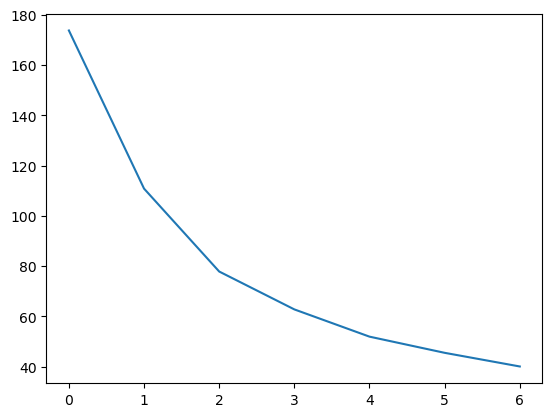

In [20]:
#wss
wss = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
 kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
 kmeans.fit(rfm_ds_scaled)
 wss.append(kmeans.inertia_)
plt.plot(wss)

In [21]:
#silhoutte Score
range_n_clusters = [2,3,4,5,6,7,8,9]
for num_clusters in range_n_clusters:
 kmeans = KMeans(n_clusters = num_clusters,max_iter=50)
 kmeans.fit(rfm_ds_scaled)
 cluster_labels = kmeans.labels_
 silhouette_avg = silhouette_score(rfm_ds_scaled,cluster_labels)
 print('For n_clusters ={0}, the silhouette score is {1}'.format(num_clusters,silhouette_avg))


C:\Users\AayushmaanS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =2, the silhouette score is 0.595979200114821


C:\Users\AayushmaanS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =3, the silhouette score is 0.5504053739273916


C:\Users\AayushmaanS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =4, the silhouette score is 0.510727479595324


C:\Users\AayushmaanS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =5, the silhouette score is 0.4412244739869485


C:\Users\AayushmaanS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =6, the silhouette score is 0.41025017710047085


C:\Users\AayushmaanS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =7, the silhouette score is 0.41073289756639964


C:\Users\AayushmaanS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =8, the silhouette score is 0.399346996917956


C:\Users\AayushmaanS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =9, the silhouette score is 0.39068187360492923


In [23]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans .fit(rfm_ds_scaled)
print(kmeans.labels_)
rfm_ds_final['Cluster_Id'] = lbs
rfm_ds_final.head()

C:\Users\AayushmaanS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 2 0 ... 1 0 0]


,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


<Axes: xlabel='Cluster_Id', ylabel='Amount'>

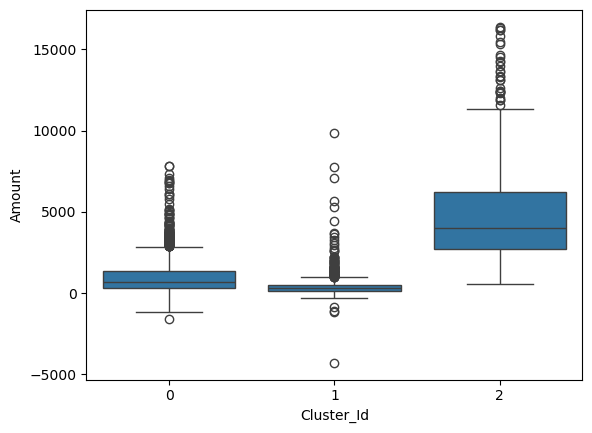

In [24]:
sns.boxplot(x='Cluster_Id', y='Amount', data = rfm_ds_final)

# From Above Chart we can analyze that people are spending more on cluster 2

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

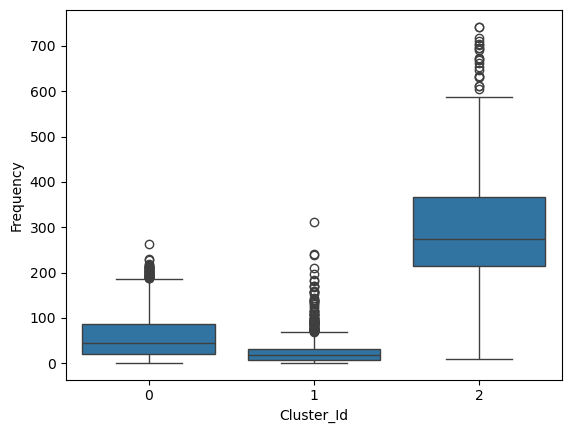

In [25]:
sns.boxplot(x='Cluster_Id', y ='Frequency', data = rfm_ds_final)

# People from Cluster 2 are frequent buyer and spend on Average between 2500-5000

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

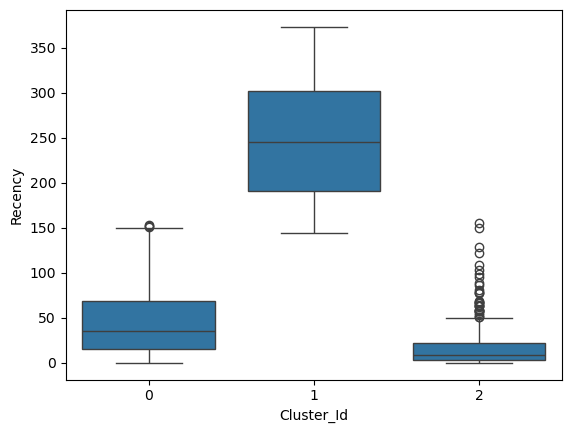

In [26]:
sns.boxplot(x='Cluster_Id', y='Recency', data = rfm_ds_final)